#Organizing the modules
files, however, can go in folders and so can modules.
* A package is a collection of modules in a folder.
* The name of the package is the name of the folder.
* All we need to do to tell python that a folder is a packae is a place ( a normally empty file ) file in the folder named __init__.py.

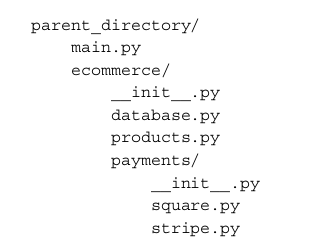

* ecommerce is a package. Package has multiple modules or files.
* Let's additionally have another package named "Payments". A package can have another package.

# Absolute Imports:
* Absolute imorts specify the complete path to the module, function, or path we want to import. 
* If we need access to Product class inside products module, we could use any of these syntaxes to do an absolute import.

import ecommerce.products
product = ecommerce.products.Product()

from ecommerce.products import Product
product = Product()

* the import statements use the period operator to seperate packages or modules.

* These statements will work from any module. 

For examples, the packages can also be installed to the python site packages folder, or the PYTHONPATH environment variable could be customized to dynamically tell Python what folders to search for packages and modules it is going to import.

* So, with these choices, which syntax do we choose?
- It depends on your personal taste and the application at hand.
- if there are dozens of classes and functions inside, the product module that i want to use, i generally import the module name using the

from ecommerce import products

product = products.Product()

* the import statements use the period operator to separate packages or modules.

* Packages can also be installed to the python site packages folder, or the PYTHONPATH environment variable could be customized to dynamically tell python what folders to search for packages and modules it is going to import.

Author recommends the following:
* from ecommerce import products syntax, and then access the individual classes using products.Product.
* If only need one or two classes fromthe products module, I can import them directly using the from ecommerce.products import Product.

# Relative Imports:

* When working with related modules in a package, it seems kind of silly to specify the full path, we know what our parent module is named.

* This is where relative imports come in. Relative imports are basically a way of saying find a class, funciton, or module as it is positioned relative to the current module.

* If we are working in the products module and we want to import the database class from the database modlue next to it, we could use relative import.

form .databas import Database

* the period in front of database says "use the database module inside the current package". In this case, the current package is the package containing the products.py file we are currently editing, that is, the ecommerce package.


